# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [7]:
data = pd.read_csv('weight-height.csv')
data.head()
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.02246780531900
print("Male height mean: ", male_df['Height'].mean())
print("Male height sd: ", male_df['Height'].std())
print("Male weight mean: ", male_df['Weight'].mean())
print("Male weight sd: ", male_df['Weight'].std())
print("Female height mean: ", female_df['Height'].mean())
print("Female height sd: ", female_df['Height'].std())
print("Female weight mean: ", female_df['Weight'].mean())
print("Female weight sd: ", female_df['Weight'].std())

Male height mean:  69.02634590621741
Male height sd:  2.863362228660647
Male weight mean:  187.0206206581932
Male weight sd:  19.7811545167638
Female height mean:  63.70877360342507
Female height sd:  2.696284015765054
Female weight mean:  135.86009300746835
Female weight sd:  19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

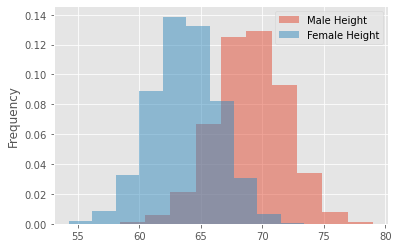

In [15]:
# Your code here
fig, ax = plt.subplots()
male_df['Height'].plot.hist(bins = 10, density = True, ax = ax, alpha = 0.5, label = 'Male Height')
female_df['Height'].plot.hist(bins = 10, density = True, ax = ax, alpha = 0.5, label = 'Female Height')
plt.legend()

In [18]:
# Record your observations - are these inline with your personal observations?
#Yes these results are inline with my personal observations. Men tend to be taller than females

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

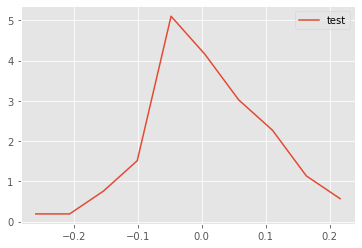

In [30]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

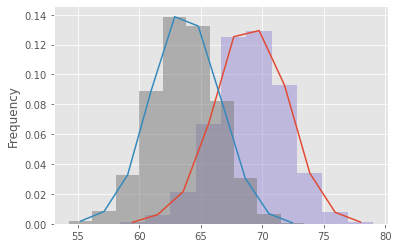

In [38]:
# You code here 

male_height_x, male_height_y = density(male_df['Height'])

female_height_x, female_height_y = density(female_df['Height'])


#fig, ax = plt.subplots()
plt.plot(male_height_x, male_height_y, label = 'Male Height Density plot')
plt.plot(female_height_x, female_height_y, label = 'Female Height Density plot')

male_df['Height'].plot.hist(bins = 10, density = True, alpha = 0.5, label = 'Male Height')
female_df['Height'].plot.hist(bins = 10, density = True, alpha = 0.5, label = 'Female Height')

plt.show()

## Repeat above exerice for male and female weights

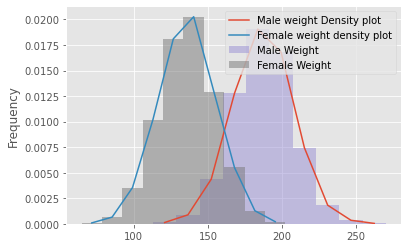

In [42]:
# Your code here 
male_weight_x, male_weight_y = density(male_df['Weight'])

female_weight_x,female_weight_y = density(female_df['Weight'])

plt.plot(male_weight_x, male_weight_y, label = "Male weight Density plot")
plt.plot(female_weight_x, female_weight_y, label = "Female weight density plot")

male_df['Weight'].plot.hist(bins = 10, density = True, alpha = 0.5, label = 'Male Weight')
female_df['Weight'].plot.hist(bins = 10, density = True, alpha = 0.5, label = 'Female Weight')
plt.legend()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
#Yes, generally men are taller and heavier than females. 
#Both the height and weight graphs have a similar shape
#Shows that men are generally taller and heavier than females.
#Also, there is still over lap in both.

# What is the takeaway when comparing male and female heights and weights?
#There is more overlap in the height density plot than weight

## Repeat Above experiments in seaborn and compare with your results

<AxesSubplot:xlabel='Height', ylabel='Density'>

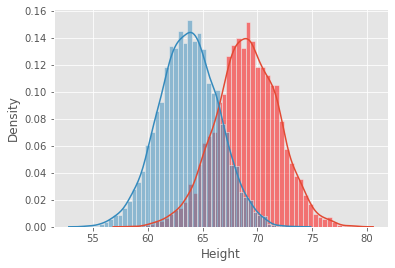

In [50]:
# Code for heights here
import seaborn as sns

sns.histplot(male_df['Height'], stat = 'density', label = 'Male Height Hist', color = 'red', alpha = 0.5)
sns.histplot(female_df['Height'], stat = 'density', label = 'Female Height Hist', alpha = 0.5)
sns.kdeplot(male_df['Height'], label = 'KDE plot for male height')
sns.kdeplot(female_df['Height'], label = 'KDE plot for female height')

<AxesSubplot:xlabel='Weight', ylabel='Density'>

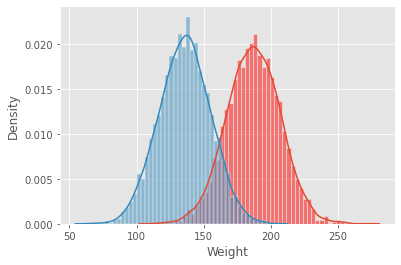

In [51]:
# Code for weights here
sns.histplot(male_df['Weight'], stat = 'density', label = 'Male Weight Hist', color = 'red', alpha = 0.5)
sns.histplot(female_df['Weight'], stat = 'density', label = 'Female Weight Hist', alpha = 0.5)
sns.kdeplot(male_df['Weight'], label = 'KDE plot for male weight')
sns.kdeplot(female_df['Weight'], label = 'KDE plot for female weight')

In [52]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
#Judging off the graphs both seaborn and matplotlib have similar shapes.
#However, seaborn has a smoother and cleaner graph.

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.